# Image Segementation and the Watershed Algorithm

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

##### Our Task: Draw Contours Around the Coins

##### Common Coin Example

# Naive Approach

Let's try to simply use a threshold and then use findContours.

#### Example Image

In [5]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

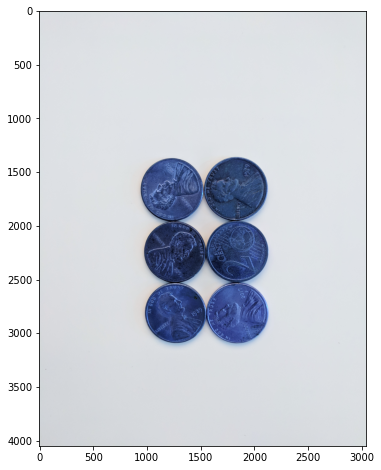

In [6]:
display(sep_coins)

In [7]:
# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

##### Median Blur
We have too much detail in this image, including light, the face edges on the coins, and too much detail in the background. Let's use Median Blur Filtering to blur the image a bit, which will be useful later on when we threshold.

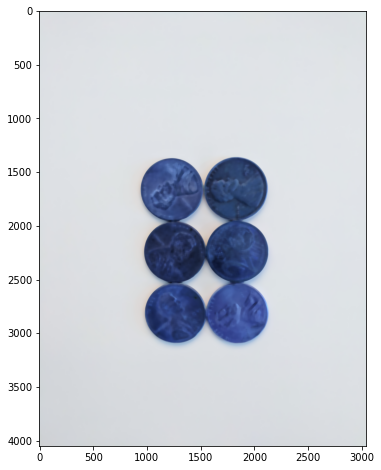

In [8]:
sep_blur =cv2.medianBlur(sep_coins,25)
display(sep_blur)

##### Grayscale

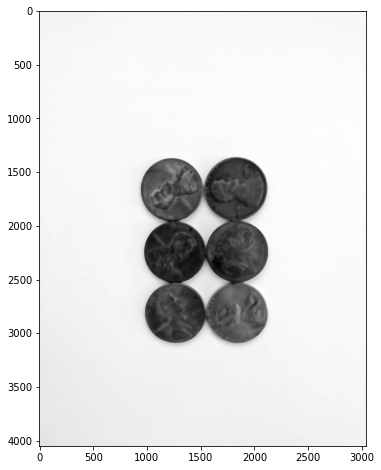

In [9]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins,cmap='gray')

##### Binary Threshold

In [10]:
ret, th1 = cv2.threshold(gray_sep_coins,160, 255,cv2.THRESH_BINARY_INV)

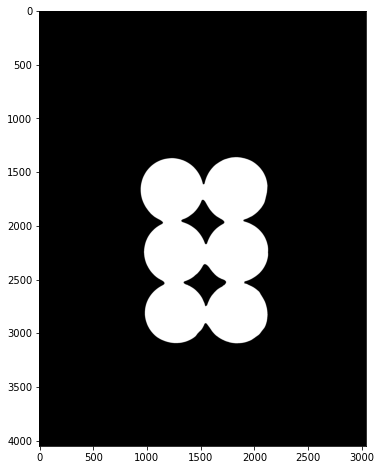

In [11]:
display(th1,cmap='gray')

##### FindContours

In [15]:
images , contours , hierarchy = cv2.findContours(th1.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


In [16]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),10)

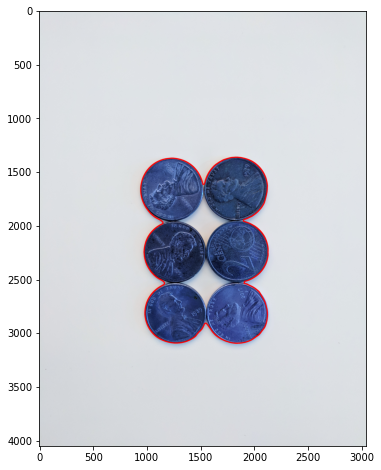

In [17]:
display(sep_coins)

# Watershed Algorithm

## Using the WaterShed Algorithm

#### Step 1: Read Image

In [18]:
img = cv2.imread('../DATA/pennies.jpg')

#### Step 2: Apply Blur

In [19]:
img = cv2.medianBlur(img,35)

#### Step 3: Convert to Grayscale

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Step 4: Apply Threshold (Inverse Binary with OTSU as well)

In [23]:
ret, thresh = cv2.threshold(gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

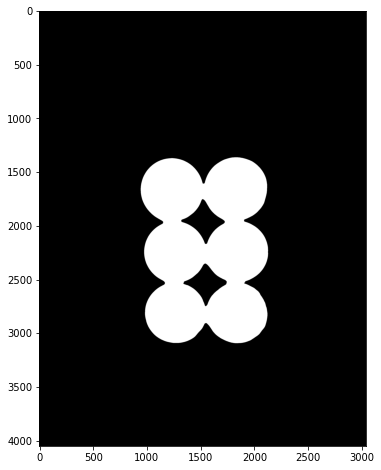

In [24]:
display(thresh)

#### Optional Step 5: Noise Removal

In [25]:
kernel = np.ones((3,3), np.uint8)

In [26]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

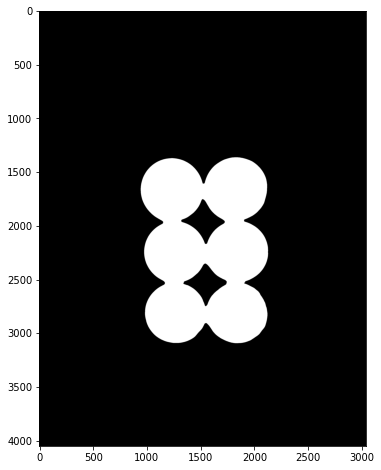

In [27]:
display(opening,cmap='gray')

#### Step 6: Grab Background that you are sure of


In [30]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

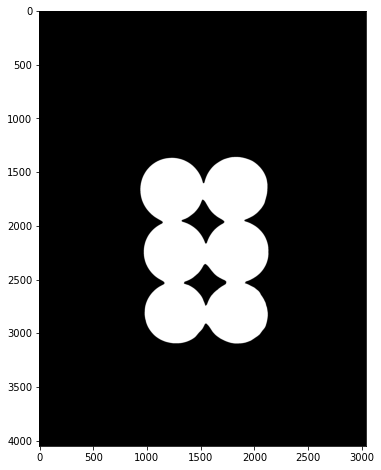

In [31]:
display(sure_bg,cmap='gray')

#### Step 7: Find Sure Foreground
Distance transform

In [28]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)

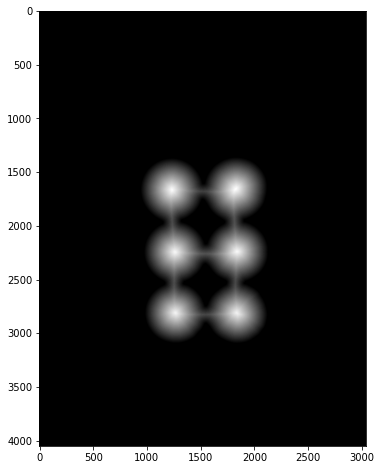

In [29]:
display(dist_transform)

In [32]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

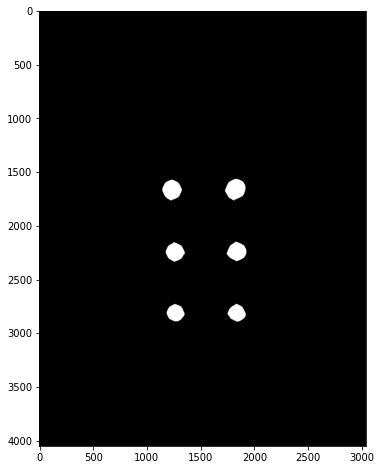

In [33]:
display(sure_fg)

#### Step 8: Find Unknown Region

In [34]:
sure_fg = np.uint8(sure_fg)

In [36]:
unknown = cv2.subtract(sure_bg,sure_fg)

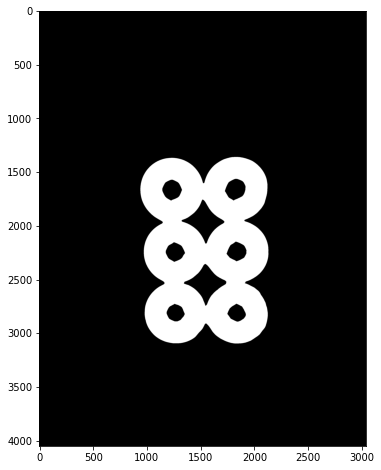

In [37]:
display(unknown)

#### Step 9: Label Markers of Sure Foreground

In [39]:
ret, markers = cv2.connectedComponents(sure_fg )

In [40]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [41]:
markers = markers + 1

In [43]:
markers[unknown==255] = 0 

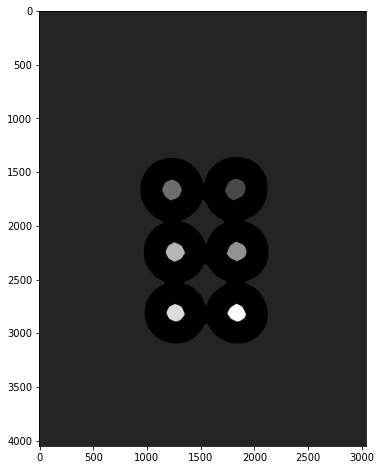

In [44]:
display(markers)

#### Step 10: Apply Watershed Algorithm to find Markers

In [45]:
markers = cv2.watershed(img, markers)

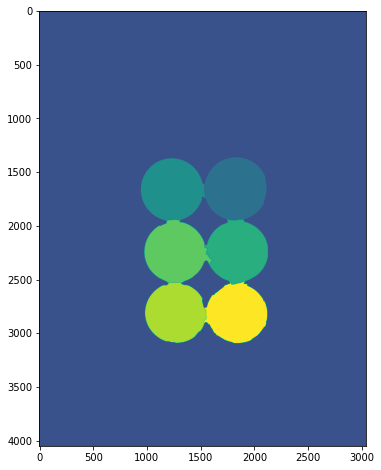

In [47]:
display(markers, cmap=None)

#### Step 11: Find Contours on Markers

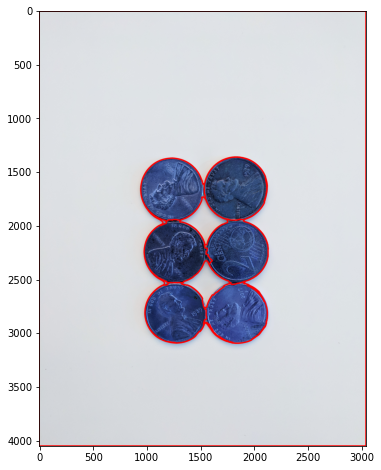

In [49]:
images , contours , hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):  
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),10)

display(sep_coins)